# Лабораторная работа 3. Описательная статистика


## Ваши данные
Заполните следующую информацию:

*Имя: Андрей

*Фамилия: Егоров

*Электронная почта: Egorov_AS@mgpu.ru



In [1]:
# imports and setup
import pandas as pd
import scipy as sc
from scipy.stats import norm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Часть 3.1: Индекс качества воздуха SLC

В этой задаче изучить качество воздуха в Солт-Лейк-Сити.

### Задача 3.1.0. Узнайте об AQI

Прочтите об [индексе качества воздуха (AQI)](https://www.airnow.gov/aqi/aqi-basics) и
Система [AirNow](https://www.airnow.gov/about-airnow).


### Задача 3.1.1. Скачать данные
Агентство по охране окружающей среды предоставляет доступ к данным о качестве воздуха на веб-сайте AirData. Прочтите о данных, доступных на [этой информационной странице] (https://www.epa.gov/outdoor-air-quality-data/air-data-basic-information). Или скачайте файл `ad_viz_plotval_data.csv` в каталоге задания.


Перейдите на [website] (https://www.epa.gov/outdoor-air-quality-data/download-daily-data) и загрузите следующие ежедневные данные:

+ Pollutant = PM2.5
+ Year = 2023
+ City = Salt Lake City, UT
+ Monitor Site = All Sites

### Задача 3.1.2. Импорт данных. Предобработка данных
Используйте функцию `pandas.read_csv()` для импорта данных.

Предупреждение: эти данные не соответствуют критериям качетсва:

+ Даты не сортируются.
+ Некоторые даты могут иметь пропущенные значения.
+ Некоторые даты могут иметь несколько значений, соответствующих разным датчикам (POC=1,2,3,4,5).

Загрузка файла в Google Colab

In [3]:
from google.colab import files
uploaded = files.upload()

Saving ad_viz_plotval_data.csv to ad_viz_plotval_data.csv


Запись данных из файла ad_viz_plotval_data.csv в Датафрейм

In [4]:
ad_viz_plotval_data = pd.read_csv('ad_viz_plotval_data.csv')
df = pd.DataFrame(ad_viz_plotval_data)

Просмотр Датафрейма первых 10 строк

In [5]:
df.head(10)

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2023,AQS,490352005,1,4.6,ug/m3 LC,19,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
1,01/02/2023,AQS,490352005,1,4.0,ug/m3 LC,17,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
2,01/03/2023,AQS,490352005,1,12.5,ug/m3 LC,52,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
3,01/04/2023,AQS,490352005,1,9.9,ug/m3 LC,41,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
4,01/05/2023,AQS,490352005,1,2.2,ug/m3 LC,9,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
5,01/06/2023,AQS,490352005,1,5.0,ug/m3 LC,21,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
6,01/07/2023,AQS,490352005,1,7.8,ug/m3 LC,33,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
7,01/08/2023,AQS,490352005,1,2.0,ug/m3 LC,8,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
8,01/09/2023,AQS,490352005,1,1.9,ug/m3 LC,8,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167
9,01/10/2023,AQS,490352005,1,1.0,ug/m3 LC,4,Copper View,1,100.0,88101,PM2.5 - Local Conditions,41620,"Salt Lake City, UT",49,Utah,35,Salt Lake,40.598056,-111.894167


### Задача 3.1.3. Визуализация данные

1. Данные содержат несколько записей о концентрации PM2,5 и AQI на одну и ту же дату, измеренных на разных объектах и с помощью разных датчиков (POCS). Постройте средние значения PM2,5 и AQI относительно даты на одном графике. Все, кто анализирует график, должен уметь определять: какова средняя концентрация PM 2,5 или значение AQI на конкретную дату.

2. Постройте график зависимости средней концентрации PM 2,5 от даты для двух разных участков (идентификаторы участков — 490352005 и 490353015). Обратите внимание, что в этом случае среднее значение берется по POC. Резудбьтаты для обоих участков должны быть на одном рисунке.
*Подсказка*: использовать функцию `pandas groupby`.


Просмотрим типы данных по столбцам

In [6]:
df.dtypes

Date                               object
Source                             object
Site ID                             int64
POC                                 int64
Daily Mean PM2.5 Concentration    float64
UNITS                              object
DAILY_AQI_VALUE                     int64
Site Name                          object
DAILY_OBS_COUNT                     int64
PERCENT_COMPLETE                  float64
AQS_PARAMETER_CODE                  int64
AQS_PARAMETER_DESC                 object
CBSA_CODE                           int64
CBSA_NAME                          object
STATE_CODE                          int64
STATE                              object
COUNTY_CODE                         int64
COUNTY                             object
SITE_LATITUDE                     float64
SITE_LONGITUDE                    float64
dtype: object

У стобца (Date) тип данных "объект, надо изменить тип данных

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

Оставляем необходимые нам столбцы для выполнения задания

In [8]:
df_1 = df[['Date', 'Daily Mean PM2.5 Concentration', 'DAILY_AQI_VALUE']]

Группируем данные столба (Date) по дате и находим среднее PM2,5 и AQI

In [9]:
groupby = df_1.groupby('Date').mean().reset_index()
round(groupby, 2)

,Date,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE
0,2023-01-01,3.49,14.61
1,2023-01-02,2.64,11.00
2,2023-01-03,9.66,40.11
3,2023-01-04,7.28,30.28
4,2023-01-05,2.54,10.56
...,...,...,...
360,2023-12-27,15.31,57.72
361,2023-12-28,22.40,72.67
362,2023-12-29,24.12,76.22
363,2023-12-30,25.47,77.89


Строим средние значения PM2,5 и AQI относительно даты на одном графике




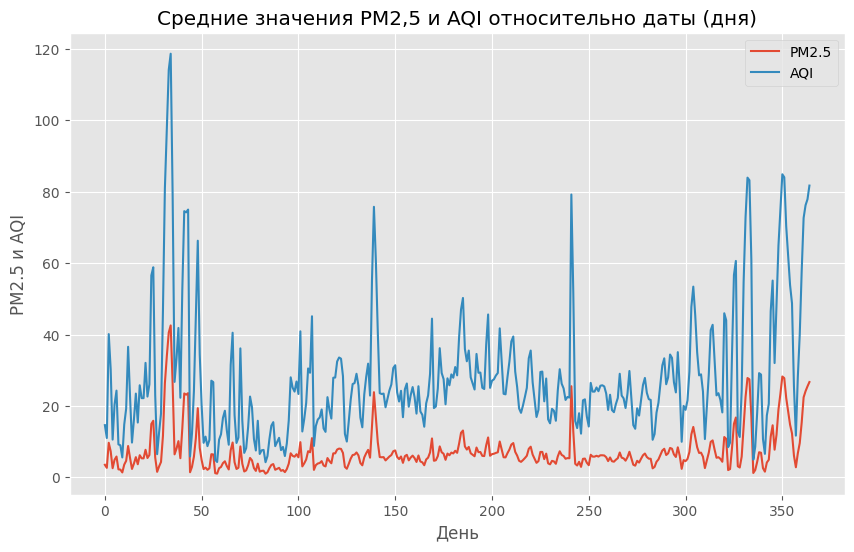

In [10]:
plt.plot(groupby.index, groupby['Daily Mean PM2.5 Concentration'], label='PM2.5')
plt.plot(groupby.index, groupby['DAILY_AQI_VALUE'], label='AQI')
plt.xlabel('День')
plt.ylabel('PM2.5 и AQI')
plt.title('Средние значения PM2,5 и AQI относительно даты (дня)')
plt.legend()
plt.show()

In [16]:
delenie = groupby['DAILY_AQI_VALUE'] / groupby['Daily Mean PM2.5 Concentration']
delenie

0      4.181240
1      4.168421
2      4.151811
3      4.160305
4      4.157549
         ...   
360    3.769956
361    3.244048
362    3.159834
363    3.057797
364    3.062669
Length: 365, dtype: float64

На графике кажется, что значения PM 2.5 и AQI пропорционально зависимы между сосбой. Однако проверив эту гипотезу, получаем, что отсутствует зависимость между 2 значениями

Создадим 2 Датасета, каждый будет отвечать за отдельный вид участка

In [17]:
df_1 = df[df['Site ID'] == 490352005]
df_2 = df[df['Site ID'] == 490353015]

Сгруппируем значения 2-х Датасетов по дате и POC и найдем среднее PM2.5

In [18]:
groupby_1 = df_1.groupby(['Date', 'POC'])['Daily Mean PM2.5 Concentration'].mean().reset_index()
groupby_2 = df_2.groupby(['Date', 'POC'])['Daily Mean PM2.5 Concentration'].mean().reset_index()

In [19]:
groupby_1.head(10)

,Date,POC,Daily Mean PM2.5 Concentration
0,2023-01-01,1,4.6
1,2023-01-01,4,5.3
2,2023-01-02,1,4.0
3,2023-01-02,4,4.1
4,2023-01-03,1,12.5
5,2023-01-03,4,13.4
6,2023-01-04,1,9.9
7,2023-01-04,4,8.8
8,2023-01-05,1,2.2
9,2023-01-05,4,2.2


In [20]:
groupby_2.head(10)

,Date,POC,Daily Mean PM2.5 Concentration
0,2023-01-01,1,3.5
1,2023-01-01,3,2.8
2,2023-01-02,1,2.2
3,2023-01-02,3,1.3
4,2023-01-03,1,11.0
5,2023-01-03,3,10.5
6,2023-01-04,1,10.0
7,2023-01-04,3,7.5
8,2023-01-05,1,2.6
9,2023-01-05,3,3.9


Построим график зависимости средней концентрации PM 2,5 от даты для двух разных участков

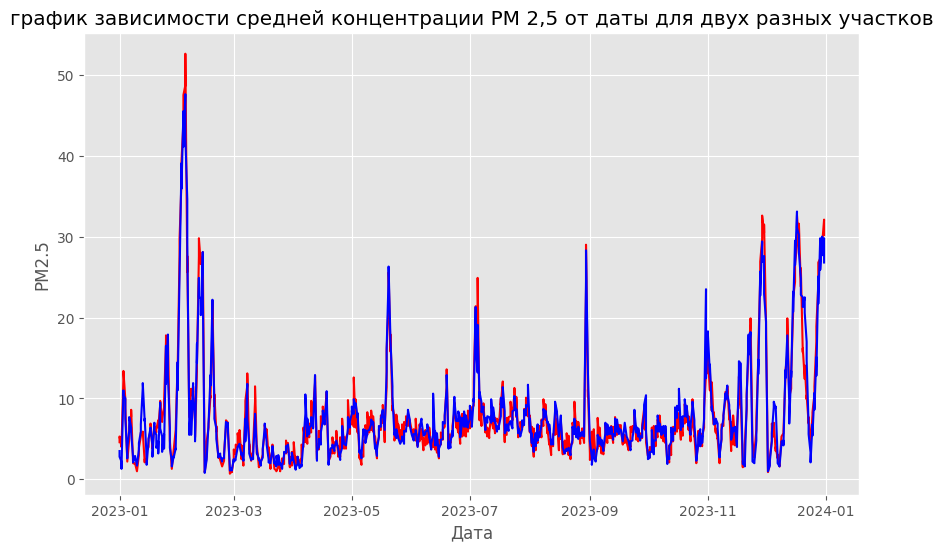

In [27]:
plt.plot(groupby_1['Date'], groupby_1['Daily Mean PM2.5 Concentration'], label = '490352005', color = 'r')
plt.plot(groupby_2['Date'], groupby_2['Daily Mean PM2.5 Concentration'], label = '490353015', color = 'b')
plt.title('График зависимости средней концентрации PM 2,5 от даты для двух разных участков')
plt.xlabel('Дата')
plt.ylabel('PM2.5')
plt.show()

Значения PM2.5 на обоих учатсках прктически совпадают, но они не равны

### Задача 3.1.4. Постройте скользящее среднее

Постройте график с дневным значением AQI и скользящим средним для дневного значения AQI. Используйте дневное значение AQI, усредненное по сайтам и POC. Поэкспериментируйте с разными временными диапазонами, чтобы найти наиболее подходящее.

*Подсказка:* Используйте `rolling()`.

Сгруппируем AQI по дате, site id, poc и найдем ее средннее значение.

In [26]:
groupby_AQI = df.groupby(['Date', 'Site ID', 'POC'])['DAILY_AQI_VALUE'].mean().reset_index()
groupby_AQI

,Date,Site ID,POC,DAILY_AQI_VALUE
0,2023-01-01,490352005,1,19.0
1,2023-01-01,490352005,4,22.0
2,2023-01-01,490353006,1,18.0
3,2023-01-01,490353006,2,28.0
4,2023-01-01,490353006,4,18.0
...,...,...,...,...
6509,2023-12-31,490353016,1,77.0
6510,2023-12-31,490354002,1,95.0
6511,2023-12-31,490354002,3,92.0
6512,2023-12-31,490450004,1,67.0


Рассчитаем скользящее среднее

In [27]:
rolling_AQI = groupby_AQI.groupby('Date')['DAILY_AQI_VALUE'].mean().rolling(window = 7).mean()
rolling_AQI

Date
2023-01-01          NaN
2023-01-02          NaN
2023-01-03          NaN
2023-01-04          NaN
2023-01-05          NaN
                ...    
2023-12-27    37.928571
2023-12-28    40.619048
2023-12-29    44.547619
2023-12-30    52.031746
2023-12-31    62.039683
Name: DAILY_AQI_VALUE, Length: 365, dtype: float64

Построим график зависимости дневного значения AQI и скользящего среднего

Text(0.5, 1.0, 'Дневное значение AQI и скользящее среднее')

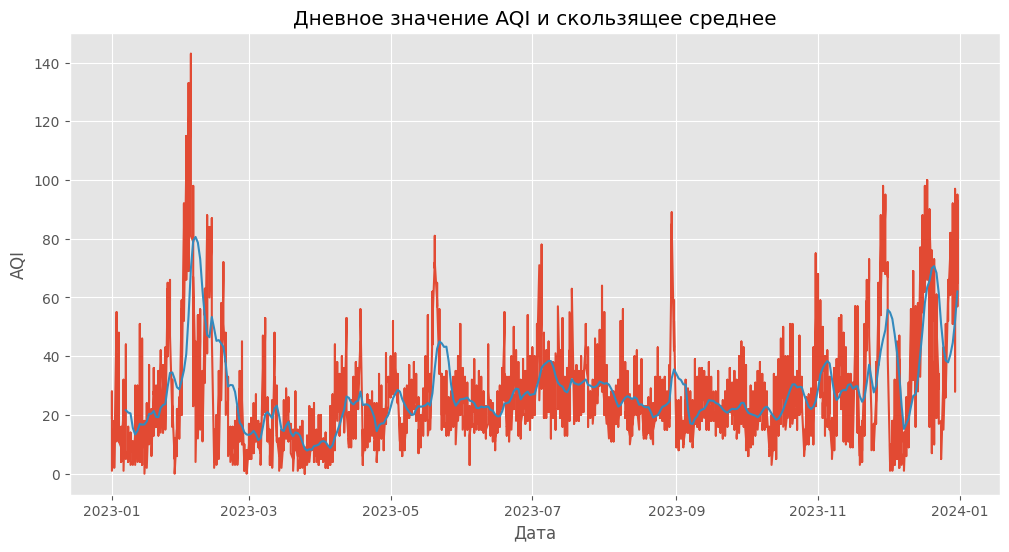

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(groupby_AQI['Date'], groupby_AQI['DAILY_AQI_VALUE'], label='Daily AQI')
ax.plot(rolling_AQI.index, rolling_AQI.values, label='7-Day Rolling Average')
ax.set_xlabel('Дата')
ax.set_ylabel('AQI')
ax.set_title('Дневное значение AQI и скользящее среднее')

## Часть 3.2. A/B-тестирование

Сначала прочитайте статью WIRED об A/B-тестировании [здесь] (http://www.wired.com/2012/04/ff_abtesting/).

Предположим, ваша компания разрабатывает новый логотип. Художественный отдел разрабатывает два логотипа: ‘Logo A’ и ‘Logo B’, показанные ниже.
![](http://www.wired.com/wiredenterprise/wp-content/gallery/20-05/ff_abtesting_f.jpg)

Ваша задача — выяснить, какой логотип лучше.


Вы решаете провести следующий эксперимент. Вы используете рекламу Google, чтобы купить 6000 рекламных объявлений. В $N_A=3000$ объявлений (выбранных случайно) вы используете логотип А, а в остальных $N_B=3000$ объявлениях вы используете логотип Б. Затем вы видите, какой логотип привлекает больше кликов.

Оказывается, $n_A=800$ зрителей с логотипом A нажимают на рекламу, а $n_B=1000$ зрителей с логотипом B нажимают на рекламу. Очевидно, что логотип B показал лучшие результаты в этом тесте, но достаточно ли разница, чтобы сказать, что логотип B лучше? Или, возможно, ‘Logo B’ просто повезло в этом тесте?

Целью этого упражнения будет проведение двухпропорционального z-теста, чтобы определить, лучше ли ‘Logo B’. Шаги будут аналогичны шагам, использованным в эксперименте Солка с полиовакциной в 1954 году (1954 Salk polio-vaccine experiment).


### Задача 3.2.1. Сформулируйте нулевую гипотезу

Пусть $p_A = n_A/N_A$ — доля кликов по логотипу A, и аналогично $p_B$ — доля кликов по логотипу B. В терминах $p_A$ и $p_B$ четко сформулируйте нулевую и альтернативную гипотезы.

**Ваше решение:** Нулевая гипотеза: доля кликов по логотипу A будет равняться доле кликов по логотипу B (pA=pB). Алтернативная гипотеза:  pA!=pB

### Задача 2.2. Найдите двухпропорциональное z-значение

Предполагая нулевую гипотезу, мы знаем, что статистика, называемая *двухпропорциональным z-значением*,
$$
Z = \frac{p_A - p_B}{\sqrt{\hat{p} \hat{q} \left( \frac{1}{N_A} + \frac{1}{N_B} \right)}}.
$$
приблизительно распределяется в соответствии со стандартным нормальным распределением. Здесь $\hat{p} = \frac{N_A}{N_A + N_B}p_A + \frac{N_B}{N_A + N_B}p_B$ и $\hat{q} = 1-\hat{p}$.


Найдите двухпропорциональное z-значение.

Импортируем библиотека numpy

In [28]:
import numpy as np

Заполняем исходные данные, присваивая им значения и подставляем в формулу. Получаем двухпропорциональное z-значение

In [34]:
Na = 3000
Nb = 3000
na = 800
nb = 1000
pA = na / Na
pB = nb / Nb
p = (Na / (Na + Nb) * pA) + (Nb / (Na + Nb) * pB)
q = 1 - p
z = (pA - pB) / np.sqrt(p * q * ((1 / Na) + (1 / Nb)))
print(round(z, 2))
print(p)

-5.63
0.3


### Задача 2.3. Завершите z-тест двух пропорций

Найдите значение $p$ для проверки гипотезы. Сначала, используя обычную функцию `cdf`, а затем проверьте свой ответ, запустив z-тест двух пропорций в Python с помощью  `proportions_ztest`.

In [31]:
P = norm.cdf(z)
P

8.785395076012362e-09

In [32]:
from statsmodels. stats.proportion import proportions_ztest
stat, pval = proportions_ztest(count= np.array([nb, na]), nobs= np.array([Nb, Na]) , value = pB)
print('{0:0.3f}'.format(pval))

0.000


Так как P < 0.05, то нулевая гипотеза не принимается. Следовательно, принимаем гипотезу pA!=pB. Так как пользователям больше нравится продукт B, а не А